<a href="https://colab.research.google.com/github/trandangtrungduc/BasicMachineLearningTask/blob/main/Analytic_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **TABLE OF CONTENTS**

---

## 1. *Introduction*

## 2. *Preparing and exploring the data*

> ###  2.1 Statistical overview

> ###  2.2 Countries and the influence

> ###  2.3 Genres and the influence

## 3. *Hypothesis testing*
> ### 3.1 Relationship between Adventure genre & Revenue 
> ### 3.1 Relationship between Drama genre & Vote average
> ### 3.2 The effect of the release date on revenue 
## 4. *Conclusion*


## **1. Introduction**

> What can we say about the success of a movie before it is released? Can we predict which films will be highly rated, whether or not they are a commercial success? TMDB is a set of 5000 movie datasets and in this report, we will focus on some important questions:



> 1. What areas have the most influence on revenue?
> 2. How is movie's revenue an average score affected by its genre?
> 3. What influence does release date have on revenue?

To answer these questions, this report includes: introduction, decribing the data, visualizations, data filtering, t-test/f-test analysis and conclusion.



## **2. Preparing and exploring the data**
### 2.1 Statistical overview

> Connect Google Drive and Google Colab and import necessary librabries

> Load the data in file csv from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import json
import re
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/tmdb_5000_movies.csv') # Load data from Google Drive
df.head() # See some information at the top of dataset

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df.shape # Size of data 


(4803, 20)

In [ ]:
df.dtypes # Type of data

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

> The data has 4803 movies and 20 features.

> The data has 3 formats: object, float64 and int64.

In [ ]:
df.describe().T # Descriptive statistic of numeric dataset


,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [ ]:
df.describe(include=[object])  # Descriptive statistic of object dataset

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4803,1712,4803,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803
unique,1175,1691,4222,37,4801,4800,3697,469,3280,544,3,3944,4800
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,Out of the Blue,"Three dance crews – one Latin American, one Eu...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host
freq,370,4,412,4505,2,1,351,2977,10,3171,4795,3,2


> Based on rows "count" of two above descriptive statistic tables, we can see that the data with missing values are: runtime, homepage, overview, release_date and tagline. We need to handle these missing values in the most reasonable way.

### 2.1 Analyzing and cleaning data

> Check missing values of each columns

In [ ]:
df[df.runtime.isnull()] # Check missing values of runtime feature

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


In [ ]:
df[df.homepage.isnull()] # Check missing values of homepage feature

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie


In [ ]:
df[df.overview.isnull()] # Check missing values of overview feature

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8


In [ ]:
df[df.release_date.isnull()] # Check missing values of release_date feature

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [ ]:
df[df.tagline.isnull()] # Check missing values of tagline feature

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400
56,185000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.startrekmovie.com/,188927,"[{""id"": 9663, ""name"": ""sequel""}, {""id"": 9743, ...",en,Star Trek Beyond,The USS Enterprise crew explores the furthest ...,65.352913,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-07,343471816,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Star Trek Beyond,6.6,2568
66,175000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://disney.go.com/disneypictures/up/,14160,"[{""id"": 965, ""name"": ""age difference""}, {""id"":...",en,Up,Carl Fredricksen spent his entire life dreamin...,92.201962,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,735099082,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Up,7.7,6870
78,175000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",http://movies.disney.com/the-jungle-book-2016,278927,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Jungle Book,After a threat from the tiger Shere Khan force...,94.199316,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2016-04-07,966550600,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Jungle Book,6.7,2892
128,150000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",http://www.angelsanddemons.com/,13448,"[{""id"": 588, ""name"": ""rome""}, {""id"": 716, ""nam...",en,Angels & Demons,Harvard symbologist Robert Langdon investigate...,67.447636,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}, {""iso_...",2009-05-13,356613439,138.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Angels & Demons,6.5,2129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4794,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",NaN,286939,[],en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.166513,"[{""name"": ""Gold Lion Films"", ""id"": 37870}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-01-20,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Sanctuary: Quite a Conundrum,0.0,0
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,

> Evaluate each data and how to process each feature base on above tables

- runtime: 
> + Missing values: 2/4803.
> + Basic statistics index: Mean 106.87, Std 22.61, Median 103.
> + Solution: Because the values 25% and 75% are not significantly different from the median and the number of missing is small, **we replace NaN with the Mean value = 106.87**.
- homepage: 
> + Missing values: 3091/4803.
> + Basic statistics index: The number of missing values is very large.
> + Solution: These values have no special relationship with other columns, feature is not too important for the purpose of this report, so we **replace NaN by an empty String**. 
- overview: 
> + Missing values: 3/4803. 
> + Basic statistics index: The number of missing values is very small.
> + Solution: These values have no special relationship with other columns, feature is not too important for the purpose of this report, so we **delete these 3 rows**.
- release_date: 
> + Missing values: 1/4803.  
> + Basic statistics index: The number of missing values is very small.
> + Solution: These values have no special relationship with other columns, feature is not too important for the purpose of this report, so we **delete 1 row**. 
- tagline: 
> + Missing values: 844/4803.  
> + Basic statistics index: The number of missing value is quite significant.
> + Solution: Feature is not too important for the purpose of this report, we **replace NaN by an empty String**.

> **Below is the code for the above analysis**

In [ ]:
df.runtime.fillna(106.87, inplace=True)  # replace NaN with the Mean value = 106.87
df.homepage.fillna('', inplace=True) # replace NaN by an empty String
df.drop(df[df.overview.isnull()].index, inplace=True) # delete these 3 rows
df.drop(df[df.release_date.isnull()].index, inplace=True) #  delete 1 row
df.tagline.fillna('', inplace=True) # replace NaN by an empty String

###  2.2 Countries and the influence

In [ ]:
# Function transform json data to list
def dict_lists(dataFrame,src_column):
    new_vals = []
    for value in dataFrame[src_column]:
        if value == value:
            # getting list of substrings
            jsons_list = re.findall('{.*?}', value)
            # getting dict_list for this value
            dicts_list = []
            for json_val in jsons_list:
                dicts_list.append(json.loads(json_val))
            new_vals.append(dicts_list)
        else:
            new_vals.append(np.nan)
    return new_vals
# List of dictionary of production_countries column
production_countries_list= dict_lists(df, "production_countries") 

list_country = []
for sample_country in production_countries_list:
    for i in range(len(sample_country)):
        if sample_country[i]['name'] not in list_country:
            list_country.append(sample_country[i]['name'])
print(list_country) # Country in tmb 5000 data          

count_country = [0]*len(list_country)
for sample_country in production_countries_list:
    for i in range(len(sample_country)):
        for country_index in range(len(list_country)):
            if sample_country[i]['name'] == list_country[country_index]:
                count_country[country_index] += 1
print(count_country) # Number of movies in each country corresponds to list_country

['United States of America', 'United Kingdom', 'Jamaica', 'Bahamas', 'Dominica', 'Czech Republic', 'Poland', 'Slovenia', 'New Zealand', 'Germany', 'China', 'Canada', 'Italy', 'Japan', 'Malta', 'Australia', 'France', 'Belgium', 'India', 'Netherlands', 'Spain', 'United Arab Emirates', 'Hong Kong', 'Taiwan', 'Ireland', 'Morocco', 'Hungary', 'Singapore', 'Norway', 'Sweden', 'South Africa', 'Russia', 'Romania', 'Mexico', 'Monaco', 'Switzerland', 'Pakistan', 'Malaysia', 'Finland', 'Iceland', 'Denmark', 'Tunisia', 'Philippines', 'Bulgaria', 'South Korea', 'Brazil', 'Peru', 'Luxembourg', 'Bosnia and Herzegovina', 'Kazakhstan', 'Portugal', 'Aruba', 'Libyan Arab Jamahiriya', 'Serbia', 'Ukraine', 'Chile', 'Argentina', 'Panama', 'Austria', 'Greece', 'Lithuania', 'Cambodia', 'Thailand', 'Slovakia', 'Israel', 'Fiji', 'Serbia and Montenegro', 'Turkey', 'Nigeria', 'Cyprus', 'Jordan', 'Bolivia', 'Ecuador', 'Colombia', 'Egypt', 'Bhutan', 'Lebanon', 'Kyrgyz Republic', 'Algeria', 'Indonesia', 'Guyana', 'I

> Looking at the two lists, we see that the number of countries in the data is 88 countries with the number of participating films focusing on only a few certain countries, so we choose about 10 countries the most to survey the influence.

In [ ]:
# Dictionary stores the number of movies of 10 countries
countries_10 = {}
for i in range(10):
      max_index = count_country.index(max(count_country))
      countries_10[list_country[max_index]] = max(count_country)
      count_country[max_index] = 0
print(countries_10) # 10 countries have the most movies

{'United States of America': 3956, 'United Kingdom': 635, 'Germany': 324, 'France': 306, 'Canada': 261, 'Australia': 110, 'Italy': 71, 'Spain': 71, 'China': 59, 'Japan': 58}


Text(0.5, 1.0, 'Distribution of number of movies')

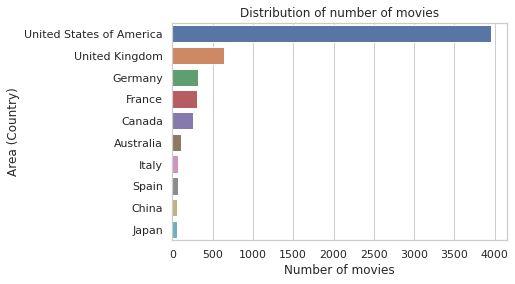

In [ ]:
# Create new dictionary to visualize
new_dict = {'Area (Country)' : countries_10.keys(), 'Number of movies': countries_10.values()}
new_frame = pd.DataFrame(data=new_dict)
sns.set(style="whitegrid")
Barplot_country = sns.barplot(y="Area (Country)", x = "Number of movies", data=new_frame)
Barplot_country.set_title('Distribution of number of movies')

> From the chart, United States of America have the most number of movies, more than 6 times higher than United Kingdom at the second rank.

> Conclusion: **United States of America has the greatest influence on film revenue.**
### 2.3  Genres and the influence

In [ ]:
# Add column of genres of movie as one hot coding
def json_to_one_hot_coding(df, column):
    for row in range(len(df)+1):
        try: 
            row_sample = df[column].loc[row]
            series = pd.read_json(row_sample).name
            for j in range(len(series)):
                cell = series[j]
                df.loc[row, cell] = 1
        except AttributeError:
            continue
        except KeyError:
            continue
           
json_to_one_hot_coding(df,"genres")

# replace NaN to 0 and convert column to int type
for i in df.columns[20:41]:
    df[i].fillna(0, inplace=True)
    df[i] = df[i].astype(np.int8)

In [ ]:
df.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


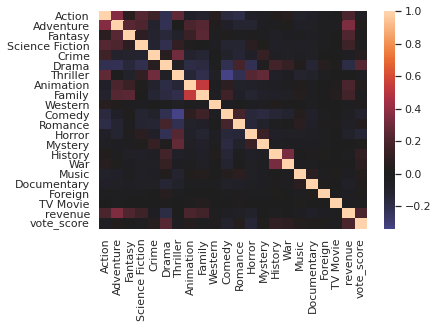

In [ ]:
# create new DataFrame from genres and add 2 columns
corr = df.iloc[:,20:41]
corr['revenue'] = df.revenue # Add revenue column
corr['vote_score'] = df.vote_average # Add vote_score
corr = corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)


> Conclusion:

> > **Based on the above heatmap we can conclude that the correlation between revenue and vote_score is very low, about 0.2.**

> > **The movie with the biggest correlation with revenue was the Adventure genre, about 0.6.**

> > **The movie that has the biggest correlation with vote_score is the Drama genre, about 0.4.**

## **3. Hypothesis testing**



> ### 3.1 Relationship between Adventure genre & Revenue

> The significant level is: $\alpha = 0.05$. Hypothesis:

> > $H_0$ : The Adventure genre affects revenue.

> > $H_1$ : There is no relationship between those two.

In [ ]:
# Find correlation coefficients and p-value of Adventure genres and revenue
stats.pearsonr(df.Adventure, df.revenue)

(0.3442779790580045, 1.2802273483999366e-133)

> We find that p-value is too small and smaller than $\alpha$.

> So **we reject $H_0$ and accept $H_1$**.

> Since Adventure genres has the largest correlation with revenue of all genres, we can conclude that **genres does not affect revenue**.

> ### 3.2 Relationship between Drama genre & Vote Average

> The significant level is: $\alpha = 0.05$. Hypothesis:

> > $ H_0$ = The Drama genre affects vote average

> > $ H_1$ = There is no relationship between those two

In [ ]:
# Find correlation coefficients and p-value of Drama genres and vote_average
stats.pearsonr(df.Drama, df.vote_average)

(0.23667240782104537, 4.373629754462493e-62)

> We find that p-value is too small and smaller than $\alpha$.

> So **we reject $H_0$ and accept $H_1$**.

> Since Drama genres has the largest correlation with vote average of all genres, we can conclude that **genres does not affect vote average**.
> ### 3.3 The effect of the release date on revenue

In [ ]:
# Convert y-m-d to m-d:
def to_day(date):
    y, m, d = str(date)[:10].split("-")
    return d

# Convert y-m-d to m:
def to_month(date):
    y, m, d = str(date)[:10].split("-")
    return m

# Convert to datetime format
df.release_date = pd.to_datetime(df.release_date)
# Create a new day of the week column
df['Day_of_week'] = df.release_date.dt.weekday
# Convert day of the week in number to text:
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key : day_names[key] for key in range(7)}
df['Day_of_week'] = df.Day_of_week.apply(lambda x: weekday_dict[x])

df['day'] = df.release_date.apply(to_day)
df['month'] = df.release_date.apply(to_month)

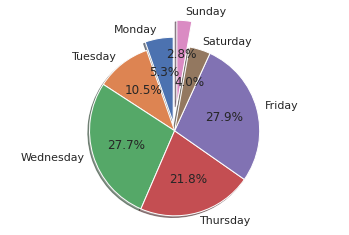

In [ ]:
sum_DOW = df.groupby("Day_of_week").sum() # Group tables by day of the week
sum_DOW = sum_DOW.loc[day_names] # Sort by day of the week order

explode = (0.1, 0, 0, 0, 0, 0, 0.3) 
fig1, chart_DOW = plt.subplots()
chart_DOW.pie(sum_DOW.revenue, explode=explode, labels=sum_DOW.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
chart_DOW.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

> Looking at the chart above, we can see that the biggest revenue are on Wednesday and Friday.

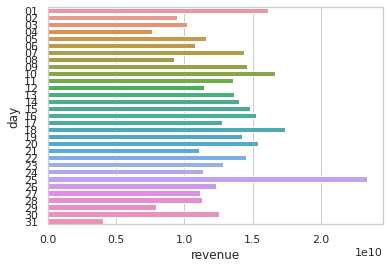

In [ ]:
sum_DOM = df.groupby("day").sum() # Group tables by day of the month
sum_DOM['day'] = sum_DOM.index
chart_DOM = sns.barplot(y = "day", x = "revenue", data=sum_DOM)


> Looking at the chart shows that the movie released on the 25th will have the biggest revenue.

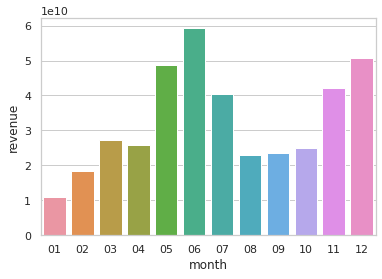

In [ ]:
month_sum = df.groupby("month").sum()
month_sum['month'] = month_sum.index

chart_MOY = sns.barplot(x="month", y = "revenue", data=month_sum)


> Looking at the chart shows that the movie released in June will have the biggest revenue.

## **4. Conclusion**
> Based on the charts and statistical analyzes above, we answer 3 questions in introduction:

>> 1.   The area with the most impact on revenue is the United State of America

>> 2.   Genres does not affect vote average and revenue.

>> 3.   Movies released on Wednesdays and Fridays each week, or 25th of each month, or in June each year will have the highest revenue.
